In [7]:
NAME = "Rubayet Bin Mujahid"
ID = "19241009"
COLLABORATORS_ID = ["", ""]

# WALKTHROUGH
Watch [this](https://youtu.be/96Ssek9nLRs) how-to tutorial first

In [8]:
# ---------------------------------------------------------------------
# ---------------------------------------------------------------------
# !!!!!!!!!!!!!!!!! WATCH THE WALKTHROUGH VIDEO FIRST !!!!!!!!!!!!!!!!!
# ---------------------------------------------------------------------
# ---------------------------------------------------------------------

# Necessary library import

In [9]:
import numpy as np 
from skimage import io, color, exposure, img_as_float
import matplotlib.pyplot as plt 

# Task 1 - Basic Image Operation

import your image or any photo taken by you (`sample.jpeg`) as a numpy array, save it in the varaible `I`

remember your image name MUST be `sample.jpeg`. 

Make sure the height and the width of the image is **smaller than 1000 pixels**.

In [10]:
I = None # Replace None with appropriate function call line

# find the height and the width of the image
H = None # should contain height
W = None # should contain width


### BEGIN SOLUTION
I = io.imread("sample.jpg")
H = I.shape[0]
W = I.shape[1]
print("Height is", H)
print("Width is", W)
plt.rcParams['figure.figsize'] = (8, 4)
### END SOLUTION

Height is 700
Width is 800


1.0 0.0


(-0.5, 799.5, 699.5, -0.5)

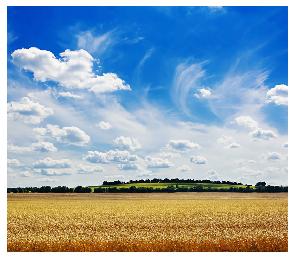

In [11]:
# Normalize the image so that the gray scales are between 0 and 1. Save it to I and display the image
I = io.imread("sample.jpg") 

### BEGIN SOLUTION
I = img_as_float(I)
print(I.max(), I.min())
io.imshow(I)
plt.axis('off')
### END SOLUTION

(-0.5, 799.5, 699.5, -0.5)

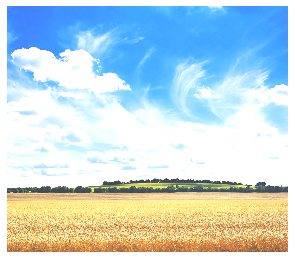

In [12]:
# Increase the brightness of the image without changing the contrast. 
# Save the resulting image in I_bright and display it.

### BEGIN SOLUTION
I_bright = np.clip(I+0.25,0,1)
io.imshow(I_bright)
plt.axis('off')
### END SOLUTION

(-0.5, 799.5, 699.5, -0.5)

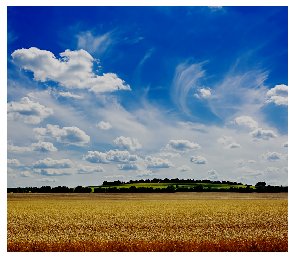

In [13]:
# Decrease the brightness of the image without changing the contrast. 
# Save the resulting image in I_dark and display it.
I_dark = None 

### BEGIN SOLUTION
I_dark = np.clip(I-0.15, 0, 1)
io.imshow(I_dark)
plt.axis('off')
### END SOLUTION

(-0.5, 799.5, 699.5, -0.5)

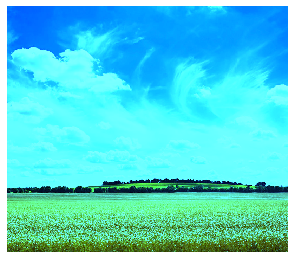

In [14]:
# Multiply the three channels of image I with three DIFFERENT numbers between 0.3 and 3 
# Save the resulting image in I_tint and display it.
# The resulting image should have some color shift
I_tint = None

# HINT: 
# I_tint = np.zeros(I.shape)
# I_tint[:, :, 0] =  ..... I[:, :, 0].....
# ......

### BEGIN SOLUTION
I_tint = np.zeros(I.shape)
I_tint[:,:,0] = np.clip(I[:,:,0]*0.50,0,1)
I_tint[:,:,1] = np.clip(I[:,:,1]*1.5,0,1)
I_tint[:,:,2] = np.clip(I[:,:,2]*2,0,1)
io.imshow(I_tint)
plt.axis('off')
### END SOLUTION

(-0.5, 799.5, 699.5, -0.5)

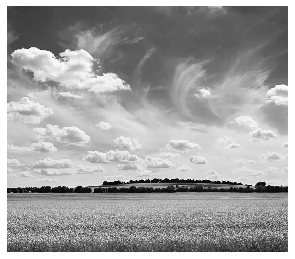

In [15]:
# Convert the image into a grayscale image.
# Save it to I_gray and display it
I_gray = None

### BEGIN SOLUTION
I_gray = color.rgb2gray(I)
io.imshow(I_gray)
plt.axis('off')
### END SOLUTION

(-0.5, 799.5, 699.5, -0.5)

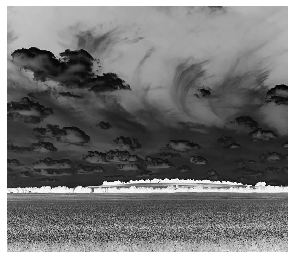

In [16]:
# Display the negative of the grayscale image

### BEGIN SOLUTION
I_neg = 1-I_gray
io.imshow(I_neg)
plt.axis('off')
### END SOLUTION

(-0.5, 799.5, 699.5, -0.5)

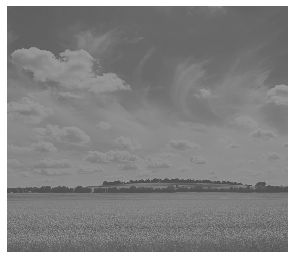

In [17]:
# Artificially degrade the **grayscale image** by reducing it contrast
# You can do so by recaling the gray values and concentrating them in a narrow range,
# say between 0.3 and 0.6.
# Save the image as I_degraded and display it
# HINT: SEE lec-4-demo-codes

I_degraded = None

### BEGIN SOLUTION
I_degraded = exposure.rescale_intensity(I_gray, in_range=(0, 1), out_range=(0.3, 0.6))
io.imshow(I_degraded)
plt.axis('off')
### END SOLUTION

In [18]:
# Complete the following function to perform Piecewise Linear Contrast stretching
# That is, implement the map shown in Slide 17 of Lecture 3

# Prototype: piecewise_contrast_stretch(I_gray, r1, r2, s1, s2)
# Assuming both input and output images are normalized between 0 and 1

def piecewise_contrast_stretch(I, r1, r2, s1, s2):
    # Write your code here
    I_stretched = None # replace with appropriate code
    ### BEGIN SOLUTION
    I_stretched = I.copy()
    t_r1 = 0
    t_r2 = r1
    t_s1=0
    t_s2=s1
    I_stretched[I_stretched<r1] =  (I_stretched[I_stretched<r1]-t_r1)*(t_s2-t_s1)/(t_r2-t_r1)+t_s1
    t_r1 = r1
    t_r2 = r2
    t_s1=s1
    t_s2=s2
    I_stretched[(r1<I_stretched) & (I_stretched<r2)] =  (I_stretched[(r1<I_stretched) & (I_stretched<r2)]-r1)*(t_s2-t_s1)/(t_r2-t_r1)+t_s1
    t_r1 = r2
    t_r2 = 1
    t_s1=s2
    t_s2=1
    I_stretched[I_stretched>r2] =  (I_stretched[I_stretched>r2]-r2)*(t_s2-t_s1)/(t_r2-t_r1)+t_s1
    return I_stretched    
    ### END SOLUTION



(-0.5, 799.5, 699.5, -0.5)

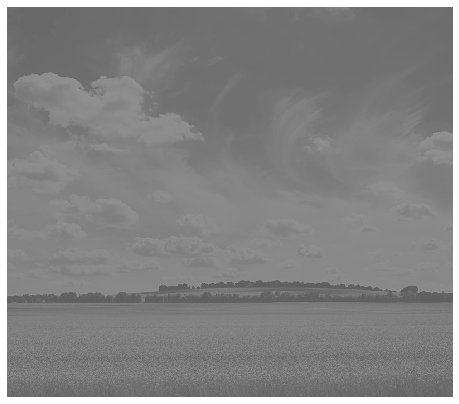

In [29]:
# To test your implementation, contrast strech the degraded image I_degrade
r1 = 0.2
r2 = 0.8
s1 = 0.3
s2 = 0.7

# Display the strtched image
I_stretched = piecewise_contrast_stretch(I_degraded, r1, r2, s1, s2)
io.imshow(I_stretched)
plt.axis('off')

### BEGIN SOLUTION

### END SOLUTION

# Task 2 - Histogram and Equalization

Text(0.5, 1.0, 'Blue')

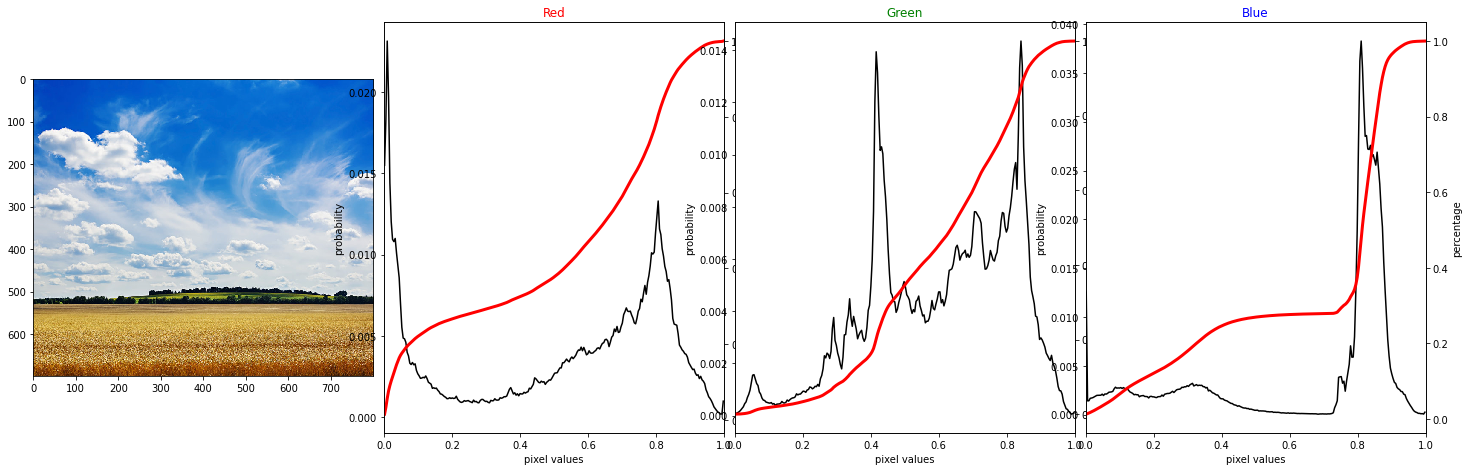

In [20]:
# Plot the Image and its histogram + cdf of the original image I
# Note that it is a color image, so it will have three different histograms

### BEGIN SOLUTION
def plot_hist(I, nbins=256, normalize=True, plot_cdf=True):
    hist, bins_hist = exposure.histogram(I.ravel(), nbins=nbins, normalize=normalize)
    plt.plot(bins_hist, hist, 'k')
    plt.xlabel("pixel values")
    if normalize:
        plt.ylabel("probability")
    else:
        plt.ylabel("count")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])
    
    if plot_cdf:
        cdf, bins_cdf = exposure.cumulative_distribution(I.ravel(), nbins=256)
        plt.twinx()
        plt.plot(bins_cdf, cdf, 'r', lw=3)
        plt.ylabel("percentage")

        
plt.rcParams['figure.figsize'] = (20, 6)
plt.subplot(1, 4, 1)
io.imshow(I)

plt.subplot(1, 4, 2)
plot_hist(I[:, :, 0], plot_cdf=True)
plt.title("Red", color="red")

plt.subplot(1, 4, 3)
plot_hist(I[:, :, 1], plot_cdf=True)
plt.title("Green", color="green")

plt.subplot(1, 4, 4)
plot_hist(I[:, :, 2], plot_cdf=True)
plt.title("Blue", color="blue")


### END SOLUTION

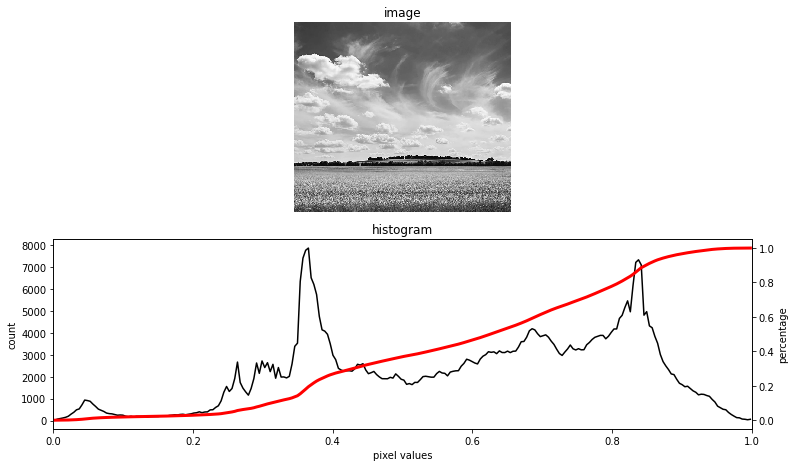

In [21]:
# Plot the Image and its histogram + cdf of the grayscale image I_gray

### BEGIN SOLUTION
plt.rcParams['figure.figsize'] = (10, 6)
def plot_img_and_hist(I, nbins=256, normalize=False, plot_cdf=True):
    plt.subplot(2, 1, 1)
    io.imshow(I)
    plt.axis("off")
    plt.title("image")
    
    plt.subplot(2, 1, 2)
    plot_hist(I, nbins=nbins, normalize=normalize, plot_cdf=plot_cdf)
    plt.title("histogram")
plot_img_and_hist(I_gray)
### END SOLUTION

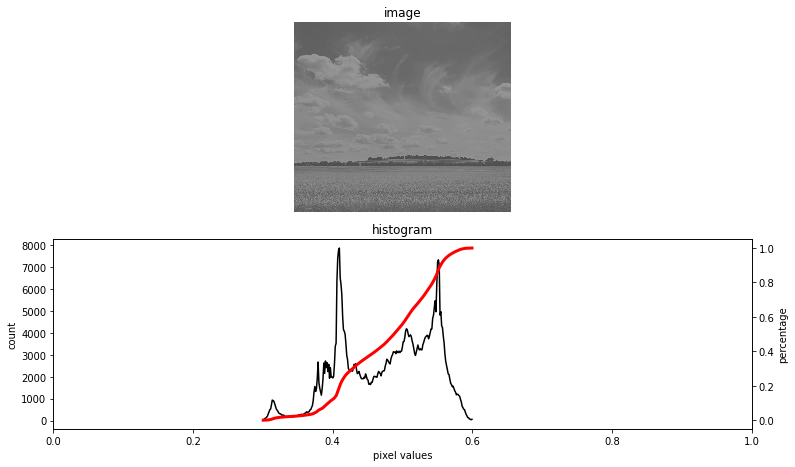

In [22]:
# Plot the Image and its histogram + cdf of the degraded image I_degraded

### BEGIN SOLUTION
plot_img_and_hist(I_degraded)
### END SOLUTION

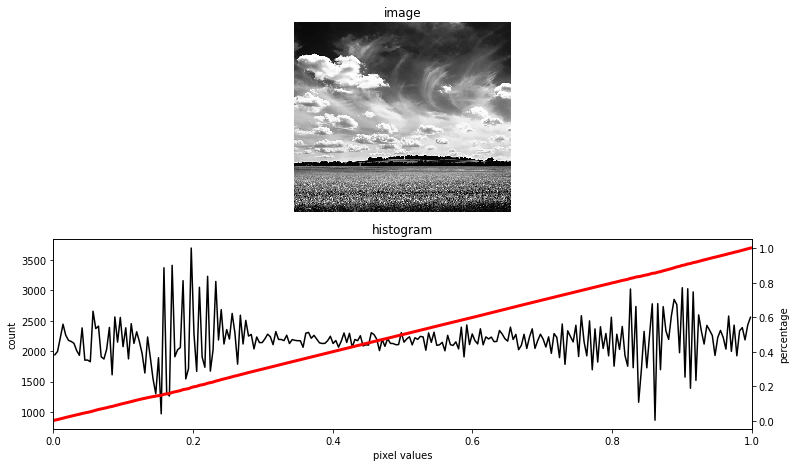

In [23]:
# Equalize the histogram of the degraded image I_degraded
# Save the result in I_recon_gray, display the image along with its histogram

I_recon_gray = None

### BEGIN SOLUTION
I_recon_gray = exposure.equalize_hist(I_degraded)
plot_img_and_hist(I_recon_gray)
### END SOLUTION

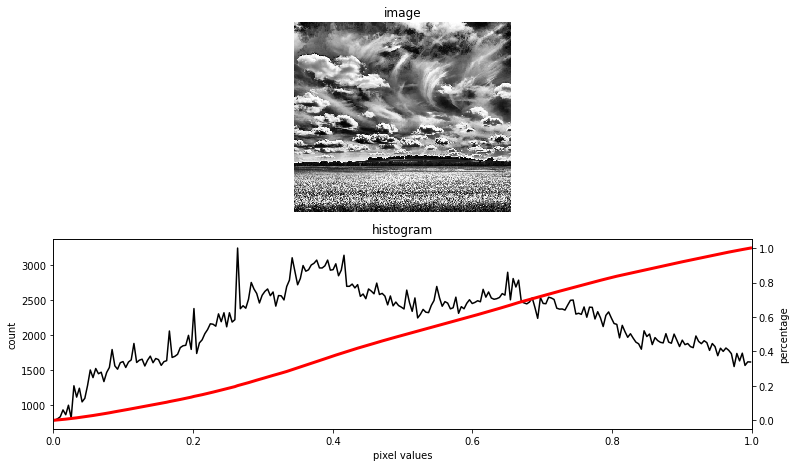

In [24]:
# Equalize the histogram of the degraded image I_degraded using AHE
# Save the result in I_recon_gray_2, display the image along with its histogram

I_recon_gray_2 = None

### BEGIN SOLUTION
I_recon_gray_2 = exposure.equalize_adapthist(I_degraded, kernel_size=(100,100), clip_limit=0)
plot_img_and_hist(I_recon_gray_2)
### END SOLUTION

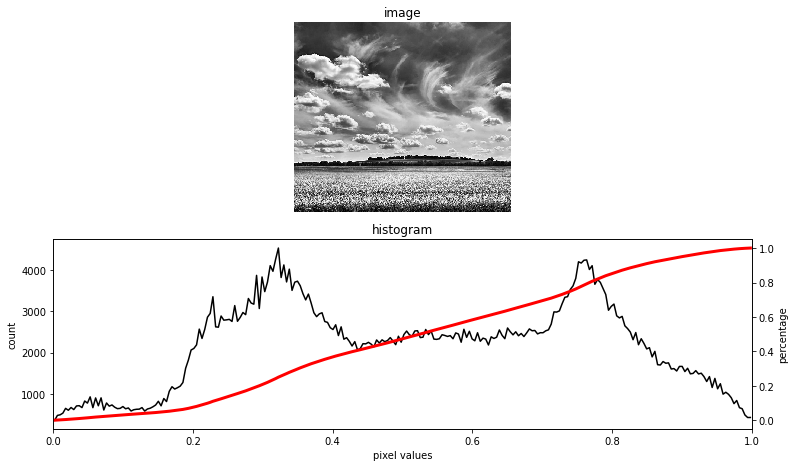

In [25]:
# Equalize the histogram of the degraded image I_degraded using CLAHE
# Save the result in I_recon_gray_2, display the image along with its histogram

I_recon_gray_3 = None

### BEGIN SOLUTION
### BEGIN SOLUTION
I_recon_gray_3 = exposure.equalize_adapthist(I_degraded, kernel_size=(100,100), clip_limit=0.01)
plot_img_and_hist(I_recon_gray_3)
### END SOLUTION

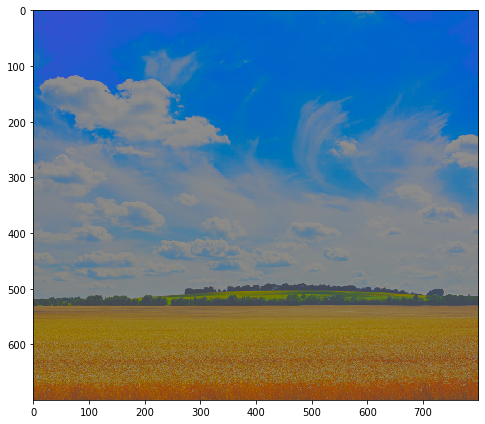

In [26]:
# Artificially degrade the original **RGB image** by reducing it contrast
# You can do so by recaling the values of the L channel (in LAB color space) 
# and concentrating them in a narrow range, say between 0.3 and 0.6.
# Save the image as I_rgb_degraded and display it
# HINT: SEE lec-4-demo-codes

I_rgb_degraded = None

### BEGIN SOLUTION
I_rgb_lab = color.rgb2lab(I)
I_rgb_lab[:,:,0]=I_rgb_lab[:,:,0]/100
I_rgb_degraded_lab = exposure.rescale_intensity(I_rgb_lab[:,:,0], in_range=(0,1), out_range=(0.3,0.6))
I_rgb_lab[:,:,0] = I_rgb_degraded_lab*100
I_rgb_degraded = color.lab2rgb(I_rgb_lab)
io.imshow(I_rgb_degraded)
### END SOLUTION

/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 3393 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


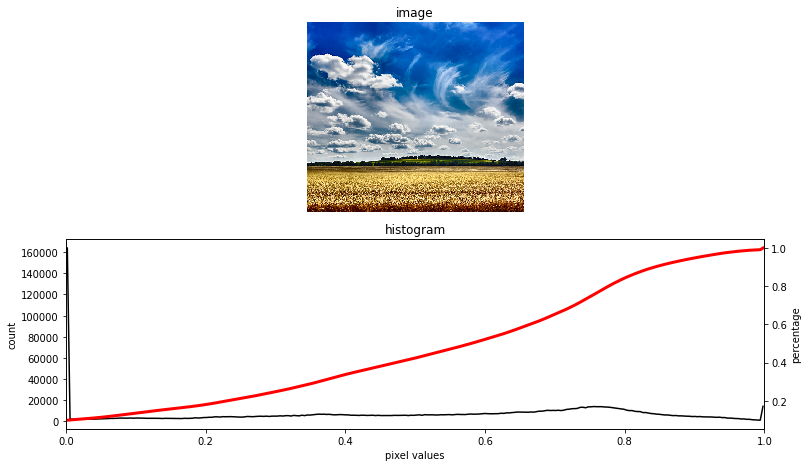

In [27]:
# Equalize the histogram of the degraded color image I_rgb_degraded using CLAHE
# Save the result in I_recon_color, display the image along with its histogram
# HINT: You have to convert to LAB first
# See the lecture and lecture-4-demo-codes

I_recon_color = None

### BEGIN SOLUTION
I_rgb_degraded_lab = color.rgb2lab(I_rgb_degraded)
I_rgb_degraded_lab[:,:,0] = I_rgb_degraded_lab[:,:,0]/100
I_rgb_degraded_lab_eq = exposure.equalize_adapthist(I_rgb_degraded_lab[:,:,0], kernel_size=(100,100), clip_limit=0.01)
I_rgb_degraded_lab[:,:,0] = I_rgb_degraded_lab_eq*100
I_recon_color = color.lab2rgb(I_rgb_degraded_lab)
plot_img_and_hist(I_recon_color)
### END SOLUTION

# Task 3 - Open Ended

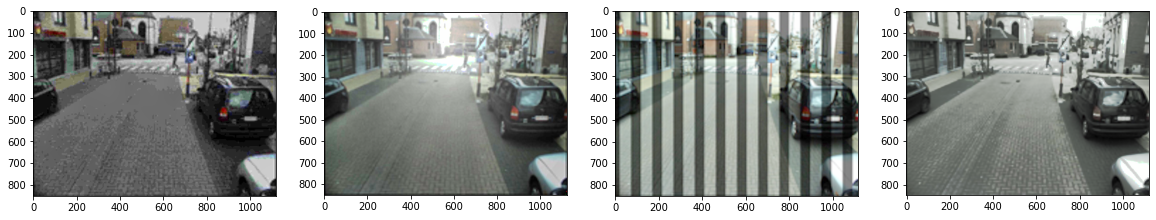

In [33]:
# There are four degraded images in this directory
# challenge-1.jpeg = very dark
# challenge-2.jpeg = washed out/foggy
# challenge-3.jpeg = alternative black bars
# challenge-4.jpeg = discoloured (the image is actually a color image) [BONUS]

# Your task is to improve these images using 
# contrast stretching, histogram equalization, AHE or CLAHE
# try different combination of parameter settings to see which produces the best result

### BEGIN SOLUTION
I1 = io.imread('challenge-1.jpg')
I2 = io.imread('challenge-2.jpg')
I3 = io.imread('challenge-3.jpg')
I4 = io.imread('challenge-4.jpg')

#image 1  
I1 = I1/255
I1_eq = exposure.equalize_adapthist(I1, kernel_size=(100,100), clip_limit=0.01)

#image 2
I2=I2/255
I2_stretched = piecewise_contrast_stretch(I2, I2.min(), I2.max(),0,1)
I2_eq = exposure.equalize_adapthist(I2_stretched, kernel_size=(150,150), clip_limit=0.01)

#image 3 
I3=I3/255
k = 10
I3_recon = np.log(1 + k*I3)
I3_recon = I3_recon/I3_recon.max()

#image 4

I4= I4/255
I4_recon = exposure.match_histograms(I4, I2_eq, multichannel=True)

I_list = [I1_eq, I2_eq, I3_recon, I4_recon]
plt.rcParams['figure.figsize'] = (20, 6)

for i, image in enumerate(I_list):
    plt.subplot(1, 4, i + 1)
    plt.imshow(image)

### END SOLUTION